📌 1. Import Library & Load Dataset

In [12]:
# ============================
# 1. IMPORT LIBRARIES
# ============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ============================
# 2. LOAD DATASET
# ============================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df['label'] = df['label'].map({'male':0, 'female':1})

df.head()


Saving voice.csv to voice (1).csv


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


📌 2. Feature Selection (Mutual Information)

Ranking Fitur Berdasarkan Mutual Information:

meanfun     0.561629
IQR         0.454050
Q25         0.405747
sd          0.302533
sp.ent      0.178826
mode        0.177031
sfm         0.130442
meanfreq    0.108916
centroid    0.108916
mindom      0.099424
maxdom      0.090468
median      0.082752
skew        0.068299
dfrange     0.066330
kurt        0.047606
meandom     0.044064
maxfun      0.040091
minfun      0.033439
Q75         0.016213
modindx     0.010393
dtype: float64


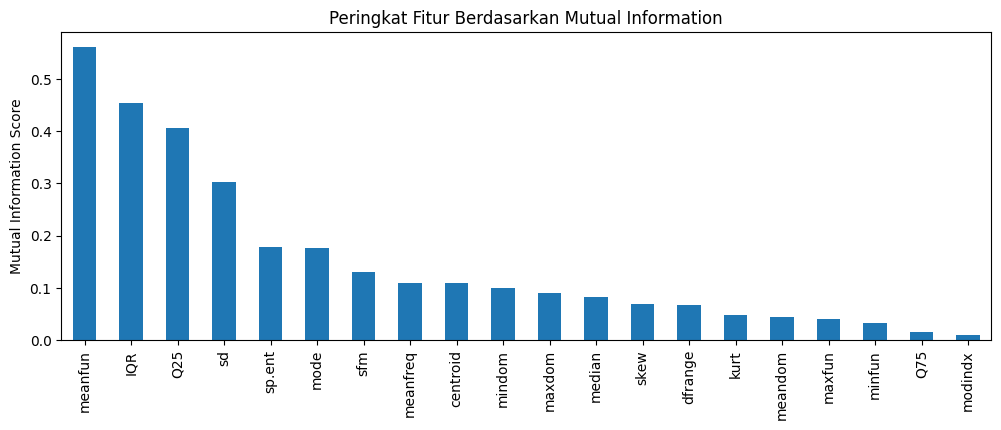

In [13]:
# ============================
# FEATURE SELECTION
# ============================
X = df.drop(columns=['label'])
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Ranking Fitur Berdasarkan Mutual Information:\n")
print(mi_series)

# Grafik ranking fitur
plt.figure(figsize=(12,4))
mi_series.plot(kind='bar')
plt.title("Peringkat Fitur Berdasarkan Mutual Information")
plt.ylabel("Mutual Information Score")
plt.show()


Eksperimen Fitur Optimal & Pencarian k Terbaik

In [14]:
# ============================
# Uji Top 1–10 Fitur Untuk Mencari Akurasi Terbaik
# ============================

hasil = []

for top_n in range(1, 11):
    selected_features = mi_series.head(top_n).index

    X_sel = df[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(
        X_sel, y, test_size=0.2, random_state=42
    )

    scaler2 = StandardScaler()
    X_train_scaled = scaler2.fit_transform(X_train)
    X_test_scaled = scaler2.transform(X_test)

    best_acc = 0
    best_k = 1

    # Cari k terbaik (1 sampai 20)
    for k in range(1, 21):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, pred)

        if acc > best_acc:
            best_acc = acc
            best_k = k

    hasil.append([top_n, list(selected_features), best_acc, best_k])

hasil


[[1, ['meanfun'], 0.9495268138801262, 5],
 [2, ['meanfun', 'IQR'], 0.9810725552050473, 12],
 [3, ['meanfun', 'IQR', 'Q25'], 0.9810725552050473, 4],
 [4, ['meanfun', 'IQR', 'Q25', 'sd'], 0.9842271293375394, 8],
 [5, ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent'], 0.9842271293375394, 8],
 [6, ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'mode'], 0.9842271293375394, 6],
 [7,
  ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'mode', 'sfm'],
  0.9858044164037855,
  10],
 [8,
  ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'mode', 'sfm', 'meanfreq'],
  0.9858044164037855,
  8],
 [9,
  ['meanfun',
   'IQR',
   'Q25',
   'sd',
   'sp.ent',
   'mode',
   'sfm',
   'meanfreq',
   'centroid'],
  0.9842271293375394,
  4],
 [10,
  ['meanfun',
   'IQR',
   'Q25',
   'sd',
   'sp.ent',
   'mode',
   'sfm',
   'meanfreq',
   'centroid',
   'mindom'],
  0.9810725552050473,
  8]]

4. Grafik Akurasi Berdasarkan Jumlah Fitur

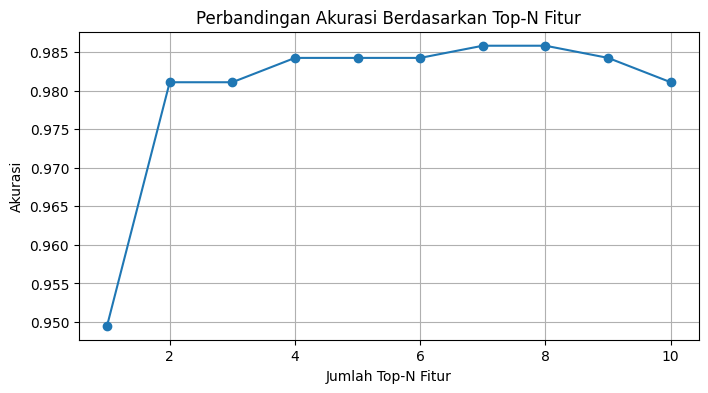

In [15]:
top_n_features = [row[0] for row in hasil]
accuracies = [row[2] for row in hasil]

plt.figure(figsize=(8,4))
plt.plot(top_n_features, accuracies, marker='o')
plt.xlabel("Jumlah Top-N Fitur")
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Berdasarkan Top-N Fitur")
plt.grid(True)
plt.show()


📌 5. Grafik Nilai k Terbaik

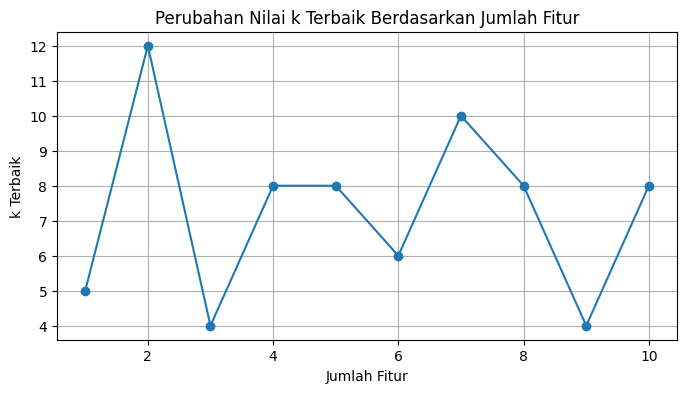

In [16]:
k_values = [row[3] for row in hasil]

plt.figure(figsize=(8,4))
plt.plot(top_n_features, k_values, marker='o')
plt.xlabel("Jumlah Fitur")
plt.ylabel("k Terbaik")
plt.title("Perubahan Nilai k Terbaik Berdasarkan Jumlah Fitur")
plt.grid(True)
plt.show()


📌 6. KESIMPULAN OTOMATIS

In [17]:
# ============================
# Kesimpulan otomatis
# ============================
best_row = max(hasil, key=lambda x: x[2])

print("=== KESIMPULAN AKHIR ===\n")
print(f"Fitur terbaik digunakan sebanyak: {best_row[0]} fitur")
print(f"Daftar fitur terbaik: {best_row[1]}")
print(f"Akurasi tertinggi: {best_row[2]:.4f}")
print(f"Nilai k terbaik: {best_row[3]}")


=== KESIMPULAN AKHIR ===

Fitur terbaik digunakan sebanyak: 7 fitur
Daftar fitur terbaik: ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'mode', 'sfm']
Akurasi tertinggi: 0.9858
Nilai k terbaik: 10
